# Installs

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
from sklearn import svm

# **H 2.1**

## **H 2.1 (a)**

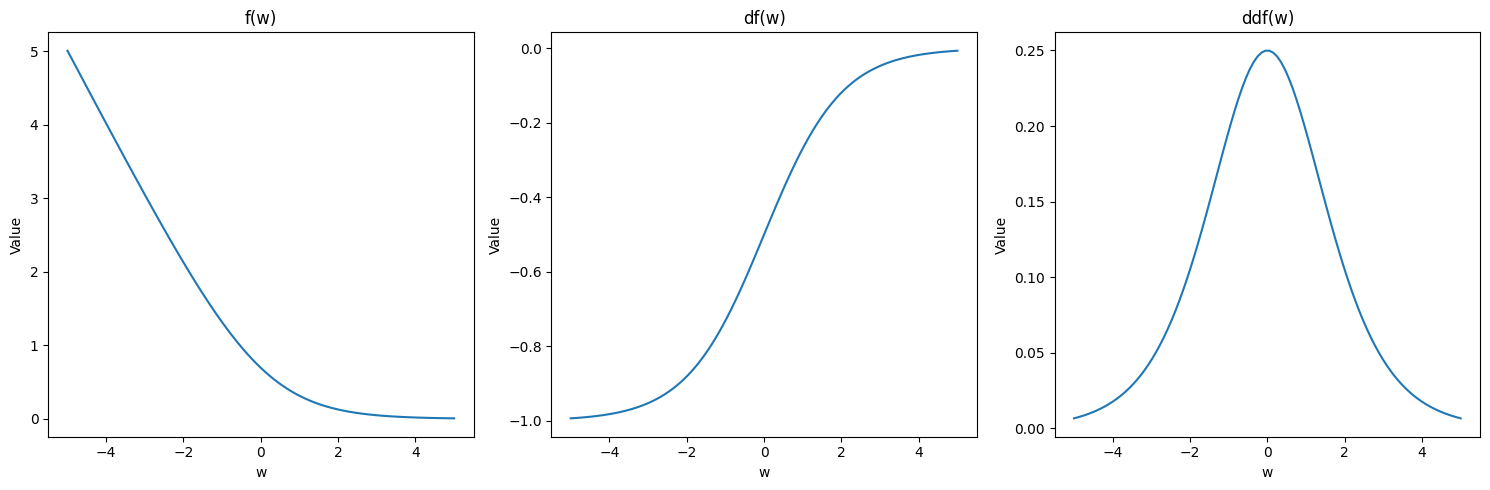

In [2]:
# asumed x is 1
def f(w):
    return np.log(1 + np.exp(-w))

def df(w):
    return (-1 * (np.exp(-w)))/(1 + np.exp(-w))

def ddf(w):
    return (np.exp(-w))/(1 + np.exp(-w))**2

w = np.linspace(-5, 5, 100)

fw = f(w)
dfw = df(w)
ddfw = ddf(w)
fig, axs = plt.subplots(1, 3, figsize=(15, 5))

# f(w)
axs[0].plot(w, fw, label='f(w)')
axs[0].set_xlabel('w')
axs[0].set_ylabel('Value')
axs[0].set_title('f(w)')

# df(w)
axs[1].plot(w, dfw, label='df(w)')
axs[1].set_xlabel('w')
axs[1].set_ylabel('Value')
axs[1].set_title('df(w)')

# ddf(w)
axs[2].plot(w, ddfw, label='ddf(w)')
axs[2].set_xlabel('w')
axs[2].set_ylabel('Value')
axs[2].set_title('ddf(w)')

plt.tight_layout()
plt.show()

The second derivative of $f(w) = \log (1+\exp(-wx))$ shows that the function is convex and the second derivative of w never touches 0.

## **H 2.1 (b)**

In [3]:
mnist = fetch_openml('mnist_784', parser='auto')
X, y = fetch_openml("mnist_784", version=1, return_X_y=True, as_frame=False, parser='auto')

In [4]:
train_X = X[0:60000,:]
train_y = y[0:60000]
test_X = X[60000:70000,:]
test_y = y[60000:70000]

X0 = train_X[train_y=='3',:]
X1 = train_X[train_y=='1',:]
y0 = np.zeros(X0.shape[0],int)
y1 = np.ones(X1.shape[0],int)

train_X = np.concatenate((X0,X1),axis=0)
train_y = np.concatenate((y0,y1),axis=0)
print('Number of training samples is {0} with {1} labels 0 and {2} labels 1'
.format(train_X.shape[0],y0.shape[0],y1.shape[0]))

X0 = test_X[test_y=='3',:]
X1 = test_X[test_y=='1',:]
y0 = np.zeros(X0.shape[0],int)
y1 = np.ones(X1.shape[0],int)

test_X = np.concatenate((X0,X1),axis=0)
test_y = np.concatenate((y0,y1),axis=0)
print('Number of test samples is {0} with {1} labels 0 and {2} labels 1'
.format(test_X.shape[0],y0.shape[0],y1.shape[0]))

train_X = np.insert(train_X,0,1,axis = 1)
test_X = np.insert(test_X,0,1,axis = 1)

Number of training samples is 12873 with 6131 labels 0 and 6742 labels 1
Number of test samples is 2145 with 1010 labels 0 and 1135 labels 1


In [5]:
class LogisticRegression:
    def __init__(self, a=0.001, max_iter=10000, tol=1e-12):
        self.a = a # learning rate
        self.max_iter = max_iter # max iterations for stopping criteria
        self.tol = tol # tolerance for stopping criteria
        self.w = None
        self.b = None

    def fit(self, X, y):
        n, m = X.shape
        self.w = np.zeros(m)
        self.b = 0
        old_J = float('inf')
        for i in range(self.max_iter):
            y_pred = self.predict(X)
            self.gradient_descent(X, y, y_pred)

            # check stopping criteria
            J = self.compute_cost(y_pred, y)
            if old_J - J < self.tol:
                break
            old_J = J

    # sigmoid function
    def predict(self, X):
        z = X.dot(self.w) + self.b
        z = np.clip(z, -200, 200) # prevent overflow
        return 1 / (1 + np.exp(-z))

    def gradient_descent(self, X, y_pred, y):
        n = len(y)
        dw = -(1 / n) * np.dot(X.T, (y-y_pred))
        db = -(1 / n) * np.sum(y - y_pred)

        # learning step
        self.w -= self.a * dw
        self.b -= self.a * db

    # cross-entropy loss
    def compute_cost(self, y_pred, y_train):
        n = len(y_train)
        y_pred = np.clip(y_pred, 1e-15, 1 - 1e-15)
        j = -1/n * np.sum(y_train * np.log(y_pred) + (1 - y_train) * np.log(1 - y_pred))
        return j

In [6]:
sigmoid_vec = np.vectorize(lambda z: 1 / (1 + np.exp(-z))) # same as LogisticRegression.predict
LR_model = LogisticRegression(a=0.0001, max_iter=100000, tol=1e-12)
LR_model.fit(train_X, train_y)
predictions = np.round(sigmoid_vec(np.matmul(test_X.astype(float), LR_model.w + LR_model.b)))
acc = 100.0 * np.sum(test_y == predictions) / test_y.shape[0]
print(acc)

7.972027972027972


In [7]:
print(predictions)

[1. 1. 1. ... 0. 0. 0.]


# **H 2.2**

## **H 2.2 (a)**

In [8]:
X = []
y = []
w_original = np.random.randint(-100, 100, 2) # 2 random weights between -100 and 100
b_original = np.random.randint(-500, 500, 1) # random bias between -500 and 500

# generate 100 random points
for _ in range(100):
    x = np.random.uniform(low=-1000, high=1000, size=2) # random x between -1000 and 1000
    label = np.sign(np.dot(x, w_original) + b_original) # label based on original weights and bias
    X.append(x)
    y.append(label)
    
X = np.array(X)
y = np.array(y)
print(X.shape)
print(y.shape)

(100, 2)
(100, 1)


In [9]:
X_train_1, X_test_1, y_train_1, y_test_1 = train_test_split(X, y, test_size=0.2, random_state=42)
X_train_2, X_test_2, y_train_2, y_test_2 = train_test_split(X, y, test_size=0.7, random_state=19)

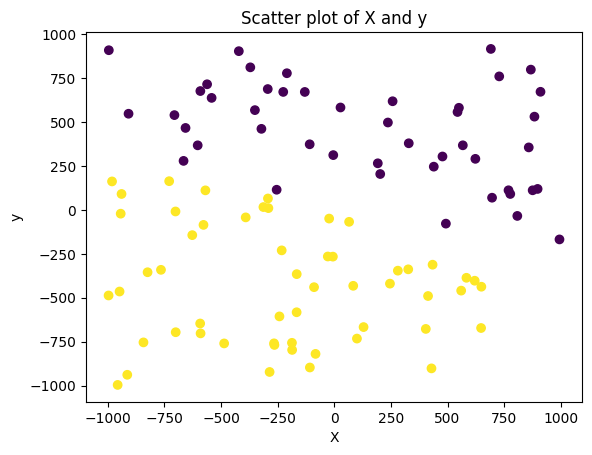

In [10]:
plt.scatter(X[:, 0], X[:, 1], c=y)
plt.xlabel('X')
plt.ylabel('y')
plt.title('Scatter plot of X and y')
plt.show()

## **H 2.2 (b)**

In [11]:
class Perceptron:
    def __init__(self, max_iter=10000):
        self.max_iter = max_iter # max iterations for stopping criteria
        self.w = None
        self.b = None
        
    def fit(self, X, y):
        n, m = X.shape
        self.w = np.zeros(m)
        self.b = 0

        for iter in range(self.max_iter):
            converged = True
            for i in range(n):
                # update weights and bias if misclassified
                if y[i] != np.sign(np.dot(X[i], self.w) + self.b):
                    self.w += 0.5 * (y[i] - np.sign(np.dot(X[i], self.w) + self.b)) * X[i] # learning rate = 0.5
                    self.b += 0.5 * (y[i] - np.sign(np.dot(X[i], self.w) + self.b))
                    converged = False
            if converged:
                print('Converged after {0} iterations'.format(iter + 1))
                break
        else:
            print('Did not converge after {0} iterations'.format(self.max_iter))
            
    def predict(self, X):
        return np.sign(np.dot(X, self.w) + self.b)    

## **H 2.2 (c)**

In [12]:
PLA = Perceptron(max_iter=1000)
PLA.fit(X_train_1, y_train_1)
data1_w, data1_b = PLA.w, PLA.b # weights and bias for data1

PLA.fit(X_train_2, y_train_2)
data2_w, data2_b = PLA.w, PLA.b # weights and bias for data2

Converged after 2 iterations
Converged after 3 iterations


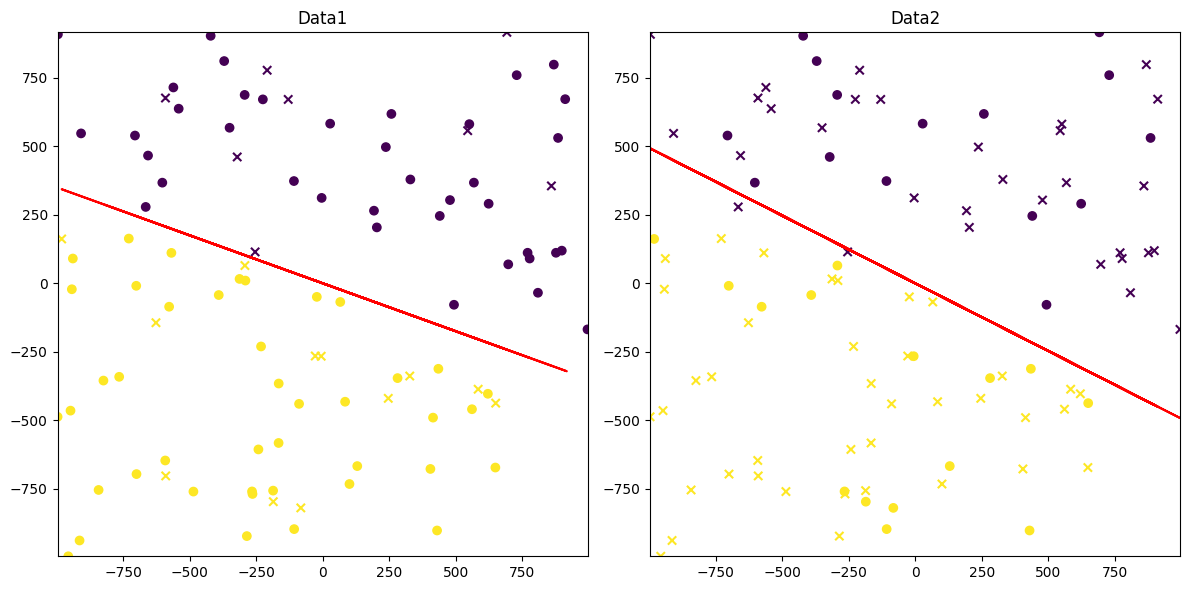

In [13]:
fig, axs = plt.subplots(1, 2, figsize=(12, 6))
axs[0].set_xlim(min(X[:, 0]), max(X[:, 0]))
axs[0].set_ylim(min(X[:, 1]), max(X[:, 1]))
axs[1].set_xlim(min(X[:, 0]), max(X[:, 0]))
axs[1].set_ylim(min(X[:, 1]), max(X[:, 1]))

# data1
axs[0].scatter(X_train_1[:, 0], X_train_1[:, 1], c=y_train_1)
axs[0].scatter(X_test_1[:, 0], X_test_1[:, 1], c=y_test_1, marker='x')
axs[0].plot(X_test_1, (-data1_w[0] * X_test_1 - data1_b) / data1_w[1], c='red')
axs[0].set_title('Data1')

# data2
axs[1].scatter(X_train_2[:, 0], X_train_2[:, 1], c=y_train_2)
axs[1].scatter(X_test_2[:, 0], X_test_2[:, 1], c=y_test_2, marker='x')
axs[1].plot(X_test_2, (-data2_w[0] * X_test_2 - data2_b) / data2_w[1], c='red')
axs[1].set_title('Data2')

plt.tight_layout()
plt.show()


## **H 2.2 (d)**

In [14]:
def compute_metrics(w, b, X_test, y_test):
    tp, fp, tn, fn = 0, 0, 0, 0 # true positive, false positive, true negative, false negative
    for i in range(len(y_test)):
        y_pred = np.sign(np.dot(X_test[i], w) + b)
        if y_test[i] == 1 and y_pred == 1:
            tp += 1
        elif y_test[i] == -1 and y_pred == 1:
            fp += 1
        elif y_test[i] == -1 and y_pred == -1:
            tn += 1
        elif y_test[i] == 1 and y_pred == -1:
            fn += 1
    accuracy, precision, recall, f1 = (tp + tn) / len(y_test), tp / (tp + fp), tp / (tp + fn), 2 * tp / (2 * tp + fp + fn)
    return accuracy, precision, recall, f1, tp, fp, tn, fn

In [15]:
data1_metrics = compute_metrics(data1_w, data1_b, X_test_1, y_test_1)
data2_metrics = compute_metrics(data2_w, data2_b, X_test_2, y_test_2)
print('Data1: tp={0}, fp={1}, tn={2}, fn={3}'.format(data1_metrics[4], data1_metrics[5], data1_metrics[6], data1_metrics[7]))
print('Data1: accuracy={0}, precision={1}, recall={2}, f1={3}'.format(data1_metrics[0], data1_metrics[1], data1_metrics[2], data1_metrics[3]))
print('------------------------------------------------------')
print('Data2: tp={0}, fp={1}, tn={2}, fn={3}'.format(data2_metrics[4], data2_metrics[5], data2_metrics[6], data2_metrics[7]))
print('Data2: accuracy={0}, precision={1}, recall={2}, f1={3}'.format(data2_metrics[0], data2_metrics[1], data2_metrics[2], data2_metrics[3]))

Data1: tp=12, fp=0, tn=8, fn=0
Data1: accuracy=1.0, precision=1.0, recall=1.0, f1=1.0
------------------------------------------------------
Data2: tp=39, fp=2, tn=29, fn=0
Data2: accuracy=0.9714285714285714, precision=0.9512195121951219, recall=1.0, f1=0.975


## **H 2.2 (e)**

In [16]:
class KPerceptron:
    def __init__(self, max_iter=10000):
        self.alpha = None
        self.X = None
        self.y = None
        self.b = 0
        self.w = None
        self.max_iter = max_iter
        
    def fit(self, X, y):
        n, m = X.shape
        self.alpha = np.zeros(n)
        self.X = X
        self.y = y
        self.b = 0

        for iter in range(self.max_iter):
            for i in range(n):
                # estimate y based on current alpha and b
                y_estimated = np.sign(np.sum([self.alpha[j] * self.y[j] * self.linear_kernel(self.X[j], self.X[i]) for j in range(n)]) + self.b)
                if y_estimated != y[i]: # misclassified
                    self.alpha[i] += 1 # update alpha
                    self.b += y[i] 

    def linear_kernel(self, x1, x2):
        return np.dot(x1, x2) 
    
    # decision boundary function
    def compute_boundary(self):
        self.w = np.sum([self.alpha[i] * self.y[i] * self.X[i] for i in range(len(self.alpha))], axis=0)

In [17]:
KPLA = KPerceptron(max_iter=1000)
KPLA.fit(X_train_1, y_train_1)
KPLA.compute_boundary()

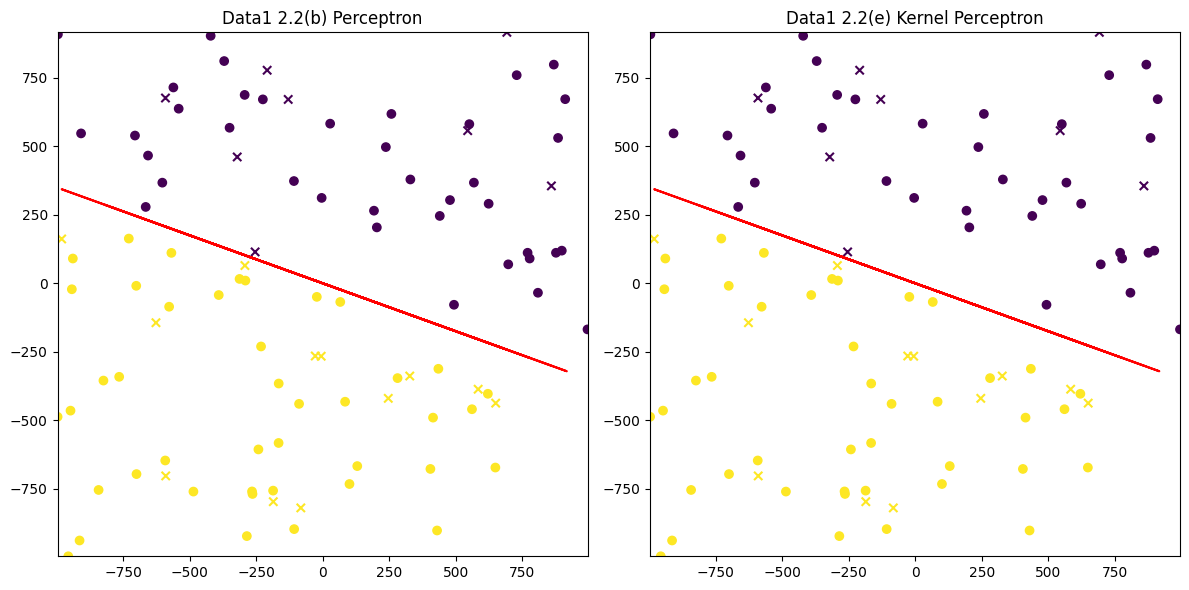

In [18]:
fig, axs = plt.subplots(1, 2, figsize=(12, 6))
axs[0].set_xlim(min(X[:, 0]), max(X[:, 0]))
axs[0].set_ylim(min(X[:, 1]), max(X[:, 1]))
axs[1].set_xlim(min(X[:, 0]), max(X[:, 0]))
axs[1].set_ylim(min(X[:, 1]), max(X[:, 1]))

# PLA
axs[0].scatter(X_train_1[:, 0], X_train_1[:, 1], c=y_train_1)
axs[0].scatter(X_test_1[:, 0], X_test_1[:, 1], c=y_test_1, marker='x')
axs[0].plot(X_test_1, (-data1_w[0] * X_test_1 - data1_b) / data1_w[1], c='red')
axs[0].set_title('Data1 2.2(b) Perceptron')

# KPLA
y_pred = -KPLA.w[0] / KPLA.w[1] * X_test_1 - KPLA.b / KPLA.w[1]
axs[1].scatter(X_train_1[:, 0], X_train_1[:, 1], c=y_train_1)
axs[1].scatter(X_test_1[:, 0], X_test_1[:, 1], c=y_test_1, marker='x')
axs[1].plot(X_test_1, y_pred, c='red')
axs[1].set_title('Data1 2.2(e) Kernel Perceptron')

plt.tight_layout()
plt.show()

Decision boundary may not be completely identical as the learning rate and convergence criteria is slightly different.

# **H 2.3**

## **H 2.3 (a)**

Applying the transformation of $\phi (x) = [1, \sqrt{2}x(1), \sqrt{2}x(2), x(1)^2, x(2)^2, \sqrt{2}x(1)x(2) ]^T$ to the feature vector set of $X= [[-1,-1],[-1,1],[1,-1],[1,1]]$  

$\begin{array}{c|c:c|c}
    n & x_n & \phi & y_n \\ \hline
    1& [-1,-1] & [1, \sqrt{2}(-1), \sqrt{2}(-1), (-1)^2, (-1)^2, \sqrt{2}(-1)(-1)] & 1\\
    2& [-1,1] & [1, \sqrt{2}(-1), \sqrt{2}(1), (-1)^2, (1)^2, \sqrt{2}(-1)(1)] & -1\\
    3& [1,-1] & [1, \sqrt{2}(1), \sqrt{2}(-1), (1)^2, (-1)^2, \sqrt{2}(1)(-1)] & -1\\
    4& [1,1] & [1, \sqrt{2}(1), \sqrt{2}(1), (1)^2, (1)^2, \sqrt{2}(1)(1)] & 1\\
\end{array}$

Comparing the results of the transformation, we now need to find the feature vector that can correctly seperate the values into the correct class. 

$\begin{array}{c|c:c:c:c:c:c|c}\hline
    n & 1 & \sqrt{2}x(1) & \sqrt{2}x(2) & x(1)^2 & x(2)^2 & \sqrt{2}x(1)x(2) & y \\ \hline
    1 & 1 & -\sqrt{2} & -\sqrt{2} & 1 & 1 & \sqrt{2} & 1\\
    2 & 1 & -\sqrt{2} & \sqrt{2} & 1 & 1 & -\sqrt{2} & -1\\
    3 & 1 & \sqrt{2} & -\sqrt{2} & 1 & 1 & -\sqrt{2} & -1\\
    4 & 1 & \sqrt{2} & \sqrt{2} & 1 & 1 & \sqrt{2} & 1\\ \hline
    y/n & n & n & n & n & n & y 
\end{array}$

Looking at $\sqrt{2}x(1)$ & $\sqrt{2}x(2)$, we see that these 2 components are not useful in classifying x as point 1 and point 4 cannot be seperated from point 2 and point 3. $x(1)^2$ & $x(2)^2$ are componenets that do not have an impact on the outcome as they all equal 1. $\sqrt{2}x(1)x(2)$ is able to seperate the points by class and is proof that the points are seperatable in the 5D space.

## **H 2.3 (b)**

In [19]:
X = np.array([[-1, -1], [-1, 1], [1, -1], [1, 1]])
y = np.array([1, -1, -1, 1])

# linear kernel
class SVM_solver:
    def __init__(self):
        self.alphas = None
        self.w = None
        self.b = None
        self.G = None
    
    # phi function
    def phi(self, x):
        phi = np.array([1, np.sqrt(2)*x[0], np.sqrt(2)*x[1], x[0]**2, x[1]**2, np.sqrt(2)*x[0]*x[1]])
        return phi
    
    # matrix G
    def compute_G(self, X, y):
        n, m = X.shape
        G = np.zeros((n, n))
        for i in range(n):
            for j in range(n):
                G[i, j] = y[i] * y[j] * np.dot(self.phi(X[i]), self.phi(X[j]))
        self.G = G
        return G
    
    def fit(self, X, y):
        n, m = X.shape
        G = self.compute_G(X, y)
        G_inv = np.linalg.inv(G) # inverse of G to compute alphas
        self.alphas = np.dot(G_inv, np.ones(n)) # G_inv * 1
        self.w = np.sum([self.alphas[i] * y[i] * self.phi(X[i]) for i in range(len(X))], axis=0) # sum of alphas * y * phi(x)
        support_vector_idx = np.argmax(self.alphas) # larger alpha is the support vector
        self.b = y[support_vector_idx] - np.dot(self.w, self.phi(X[support_vector_idx]))
        
solver = SVM_solver()
solver.fit(X, y)

In [20]:
print(solver.G)

[[ 9. -1. -1.  1.]
 [-1.  9.  1. -1.]
 [-1.  1.  9. -1.]
 [ 1. -1. -1.  9.]]


## **H 2.3 (c)**

In [21]:
print(solver.alphas)

[0.125 0.125 0.125 0.125]


All alphas are greater than 0 and meet the requirment that the sum of alpha multiplied by the label is 0.

## **H 2.3 (d)**

In [22]:
print(solver.w)

[ 2.77555756e-17 -2.77555756e-17 -5.55111512e-17  2.77555756e-17
  2.77555756e-17  7.07106781e-01]


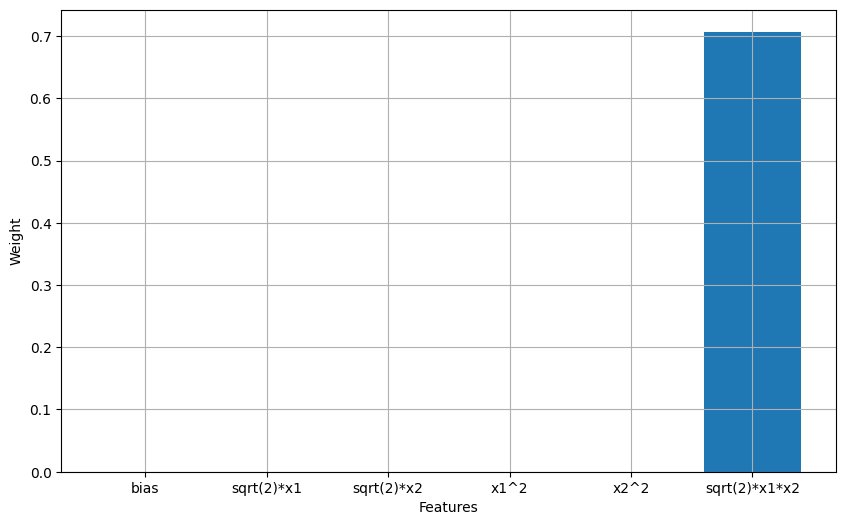

In [23]:
feature_names = ['bias', 'sqrt(2)*x1', 'sqrt(2)*x2', 'x1^2', 'x2^2', 'sqrt(2)*x1*x2']
plt.figure(figsize=(10, 6))
plt.bar(feature_names, solver.w)
plt.xlabel('Features')
plt.ylabel('Weight')
plt.grid(True)
plt.show()

The last component of phi has the highest effect on classification because the weight is the largest meaning this value likely predicts y.

# **H 2.4**

## **H 2.4 (a)**

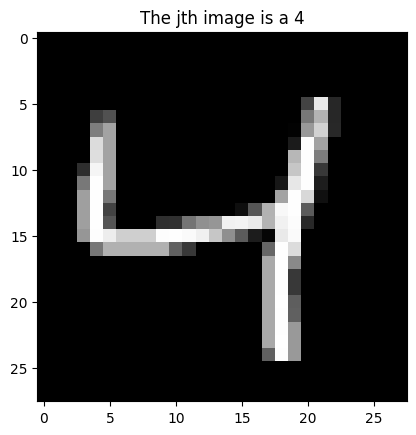

In [24]:
X, y = fetch_openml("mnist_784", version=1, return_X_y=True, as_frame=False, parser='auto')
j = 2
plt.title('The jth image is a {label}'.format(label=int(y[j])))
plt.imshow(X[j].reshape((28,28)), cmap='gray')
plt.show()

In [25]:
X4 = X[y=='4',:]
X9 = X[y=='9',:]
X4_filtered = X4[:min(len(X4), len(X9)), :]
X9_filtered = X9[:min(len(X4), len(X9)), :]

X_filtered = np.concatenate((X4_filtered, X9_filtered), axis=0)
y_filtered = np.array(['4'] * min(len(X4), len(X9)) + ['9'] * min(len(X4), len(X9)))
X_train, X_test, y_train, y_test = train_test_split(X_filtered, y_filtered, train_size=8000, stratify=y_filtered, random_state=30)
X_train_holdout, X_holdout, y_train_holdout, y_holdout = train_test_split(X_train, y_train, test_size=0.75, stratify=y_train, random_state=30)

In [26]:
C_values = np.logspace(-2, 2, 5) # [0.01, 0.1, 1, 10, 100]
df = pd.DataFrame(columns=['C', 'Accuracy', 'Degree']) # dataframe to store results for each holdout set

for degree in[1, 2]:
    C_best = None
    accuracy_best = 0
    for C in C_values:
        clf = svm.SVC(kernel='poly', C=C, degree=degree)
        clf.fit(X_train_holdout, y_train_holdout)
        accuracy = clf.score(X_holdout, y_holdout)
        new_row = pd.DataFrame({'C': [C], 'Accuracy': [accuracy], 'Degree': [degree]})
        df = pd.concat([df, new_row], ignore_index=True)
        if accuracy > accuracy_best:
            accuracy_best = accuracy
            C_best = C      
    
    clf_best = svm.SVC(kernel='poly', C=C_best, degree=degree)        
    clf_best.fit(X_train, y_train)
    Pe = 1 - clf_best.score(X_test, y_test)
    svp = clf_best.support_vectors_
    print('-----------------')
    print(f'degree: {degree} \nbest C: {C_best} \ntest error: {Pe:.6f} \nnumber of support vectors: {len(svp)}')
    
    # store best classifier for part d
    if degree == 1:
        clf_linear = clf_best
    else:
        clf_quadratic = clf_best

-----------------
degree: 1 
best C: 10.0 
test error: 0.034525 
number of support vectors: 757
-----------------
degree: 2 
best C: 100.0 
test error: 0.011686 
number of support vectors: 718


In [27]:
print(df)

        C  Accuracy Degree
0    0.01  0.867167      1
1    0.10  0.946500      1
2    1.00  0.961000      1
3   10.00  0.961333      1
4  100.00  0.948167      1
5    0.01  0.912833      2
6    0.10  0.966500      2
7    1.00  0.978833      2
8   10.00  0.980000      2
9  100.00  0.981000      2


## **H 2.4 (b)**

In [34]:
# scikit-learn states 10^-3 <= gamma|C <= 10^3 is sufficient for most cases
C_values = np.logspace(-2, 2, 5) # [0.01, 0.1, 1, 10, 100]
gammas = np.logspace(-3, 2, 5) # [0.001, 0.01, 0.1, 1, 10]
df = pd.DataFrame(columns=['C', 'Accuracy', 'gamma'])

C_best = None
g_best = None
accuracy_best = 0

for gamma in gammas:
    #print(f'gamma: {gamma}')
    for C in C_values:
        #print(f'starting C = {C}')
        clf = svm.SVC(kernel='rbf', C=C, gamma=gamma)
        clf.fit(X_train_holdout, y_train_holdout)
        accuracy = clf.score(X_holdout, y_holdout)
        new_row = pd.DataFrame({'C': [C], 'Accuracy': [accuracy], 'gamma': [gamma]})
        df = pd.concat([df, new_row], ignore_index=True)
        if accuracy > accuracy_best:
            accuracy_best = accuracy
            C_best = C
            g_best = gamma
    
clf_rbf = svm.SVC(kernel='rbf', C=C_best, gamma=g_best)        
clf_rbf.fit(X_train, y_train)
Pe = 1 - clf_rbf.score(X_test, y_test)
svp = clf_rbf.support_vectors_
print('-----------------')
print(f'gamma: {g_best} \nbest C: {C_best} \ntest error: {Pe:.6f} \nnumber of support vectors: {len(svp)}')

-----------------
gamma: 0.001 
best C: 0.1 
test error: 0.470609 
number of support vectors: 8000


In [35]:
print(df)

         C  Accuracy       gamma
0     0.01  0.508500    0.001000
1     0.10  0.508667    0.001000
2     1.00  0.508667    0.001000
3    10.00  0.508667    0.001000
4   100.00  0.508667    0.001000
5     0.01  0.500000    0.017783
6     0.10  0.500000    0.017783
7     1.00  0.500000    0.017783
8    10.00  0.500000    0.017783
9   100.00  0.500000    0.017783
10    0.01  0.500000    0.316228
11    0.10  0.500000    0.316228
12    1.00  0.500000    0.316228
13   10.00  0.500000    0.316228
14  100.00  0.500000    0.316228
15    0.01  0.500000    5.623413
16    0.10  0.500000    5.623413
17    1.00  0.500000    5.623413
18   10.00  0.500000    5.623413
19  100.00  0.500000    5.623413
20    0.01  0.500000  100.000000
21    0.10  0.500000  100.000000
22    1.00  0.500000  100.000000
23   10.00  0.500000  100.000000
24  100.00  0.500000  100.000000


## **H 2.4 (c)**

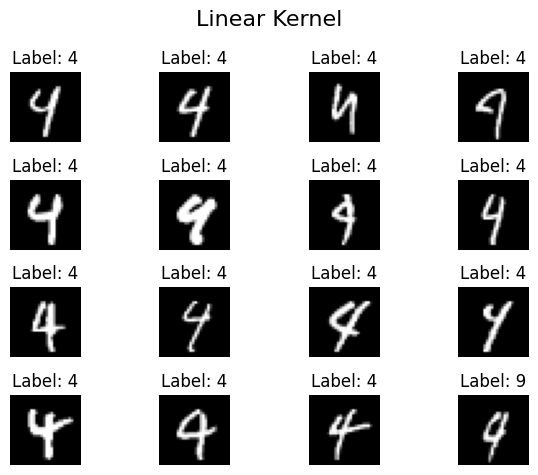

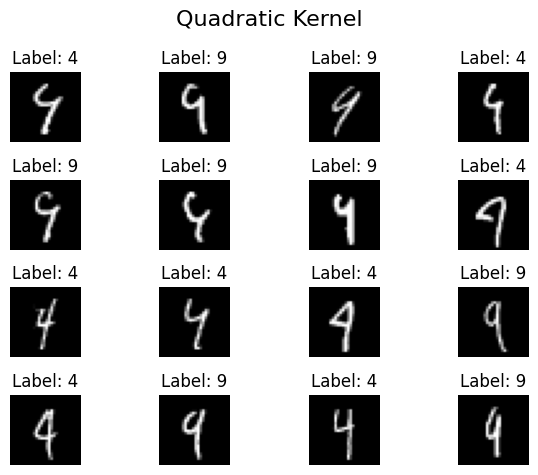

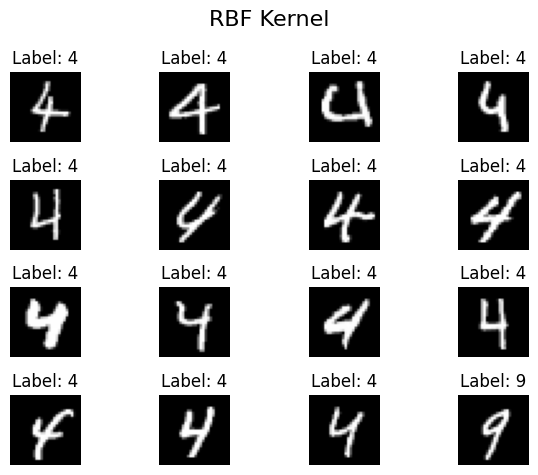

In [36]:
svm_models = [clf_linear, clf_quadratic, clf_rbf] # best models for each kernel
model_names = ['Linear Kernel', 'Quadratic Kernel', 'RBF Kernel']
for i, clf in enumerate(svm_models):

    # get indices of support vectors
    support_indices = clf.support_
    dual_coefs = np.abs(clf.dual_coef_[0])
    
    # get indices of top 16 support vectors with highest dual coefficients
    h_indices = np.argsort(dual_coefs)[-16:]
    h_support_vectors = support_indices[h_indices]
    
    f, axarr = plt.subplots(4, 4)
    f.suptitle(f'{model_names[i]}', fontsize=16)
    
    for j in range(16):
        ax = axarr[j // 4, j % 4]
        sv_index = h_support_vectors[j]
        ax.imshow(X_train[sv_index].reshape((28, 28)), cmap='gray')
        ax.set_title(f'Label: {int(y_train[sv_index])}')
        ax.axis('off')
    plt.tight_layout()
    plt.show()

The dual coefficcients are used to identify the points that are the hardest to classify as it represent the influence the points have on the decision boundary. The dual coefficients with larger absolute value have more of an impact of determining the boundary which means they are closer to the boundary. 